In [3]:
Лабораторная работа 1: Первичное исследование данных
# 1. Постановка задачи

## 1-1. Описание данных
Данные представляют собой результаты квалификационных сессий в автоспорте (скорее всего, Формула 1). Включают информацию о гонках, пилотах, командах, номерах машин, итоговых позициях и времени прохождения каждого из трёх сегментов квалификации (Q1, Q2, Q3).

## 1-2. Условный заказчик анализа
Условными заказчиками могут быть:
1. **Команды Формулы 1** (Mercedes, Ferrari, Red Bull и др.) - для анализа собственной производительности и конкурентов
2. **Организаторы гонок (FIA/FOM)** - для контроля качества данных и аналитики чемпионата
3. **Спортивные аналитики и журналисты** - для подготовки материалов и прогнозов

## 1-3. Возможные задачи интеллектуального анализа данных
1. **Описательная аналитика и поиск закономерностей**: 
   - Анализ влияния различных факторов на квалификационный результат
   - Выявление сильных и слабых сторон команд/пилотов на разных трассах
   - Сравнение производительности между сезонами

2. **Поиск аномалий и ошибок в данных**:
   - Обнаружение подозрительных или невозможных значений времени
   - Выявление потенциальных ошибок в замерах или записи данных
   - Проверка корректности квалификационных результатов


SyntaxError: invalid character '№' (U+2116) (647773295.py, line 1)

In [ ]:
2. Паспорт датасета
Загрузка данных

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


df = pd.read_csv('C:/Users/User/Lab_work1/data/qualifying.csv')

In [4]:
Структура данных

SyntaxError: invalid syntax (2445219393.py, line 1)

In [9]:
# 2-2. Определение размера датасета
print("Размер датасета:")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("\n" + "="*50)

# 2-3. Список признаков с типами и предполагаемым смыслом
print("\nПризнаки датасета:")
print("-" * 80)
print(f"{'Признак':<15} {'Тип':<15} {'Предполагаемый смысл'}")
print("-" * 80)

column_descriptions = {
    'qualifyId': 'Уникальный идентификатор записи квалификации',
    'raceId': 'Идентификатор гонки',
    'driverId': 'Идентификатор пилота',
    'constructorId': 'Идентификатор команды (конструктора)',
    'number': 'Номер машины',
    'position': 'Итоговая позиция в квалификации (чем меньше, тем лучше)',
    'q1': 'Время в первом сегменте квалификации (Q1)',
    'q2': 'Время во втором сегменте квалификации (Q2)',
    'q3': 'Время в третьем сегменте квалификации (Q3)'
}
for col in df.columns:
    print(f"{col:<15} {str(df[col].dtype):<15} {column_descriptions.get(col, 'Не определено')}")

print("\n" + "="*50)
print("\nПервые 5 строк датасета:")
print(df.head())
print("\n" + "="*50)
# 2-4. Преобразование типов данных
print("\nПреобразование типов данных:")
print("-" * 50)

# Преобразуем временные признаки из строк в секунды
def time_to_seconds(time_str):
    """Конвертирует время в формате 'минуты:секунды.миллисекунды' в секунды"""
    if pd.isna(time_str) or time_str in ['NULL', '', '']:
        return np.nan
    
    try:
        # Разделяем минуты и секунды
        parts = str(time_str).split(':')
        if len(parts) == 2:
            minutes = float(parts[0])
            seconds = float(parts[1])
            return minutes * 60 + seconds
        else:
            return np.nan
    except:
        return np.nan

# Создаем новые колонки с временем в секундах
for q_col in ['q1', 'q2', 'q3']:
    sec_col = f'{q_col}_sec'
    df[sec_col] = df[q_col].apply(time_to_seconds)
    print(f"Создана колонка {sec_col}")

# Преобразуем некоторые числовые колонки в категориальные
categorical_cols = ['raceId', 'driverId', 'constructorId', 'number']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"Колонка {col} преобразована в категориальный тип")

print("\nОбновленная информация о типах данных:")
print(df.dtypes)
print("\n" + "="*50)

Размер датасета:
Количество строк: 7516
Количество столбцов: 9


Признаки датасета:
--------------------------------------------------------------------------------
Признак         Тип             Предполагаемый смысл
--------------------------------------------------------------------------------
qualifyId       int64           Уникальный идентификатор записи квалификации
raceId          int64           Идентификатор гонки
driverId        int64           Идентификатор пилота
constructorId   int64           Идентификатор команды (конструктора)
number          int64           Номер машины
position        int64           Итоговая позиция в квалификации (чем меньше, тем лучше)
q1              str             Время в первом сегменте квалификации (Q1)
q2              str             Время во втором сегменте квалификации (Q2)
q3              str             Время в третьем сегменте квалификации (Q3)


Первые 5 строк датасета:
   qualifyId  raceId  driverId  constructorId  number  position   

In [5]:
3. Аудит качества данных

SyntaxError: invalid syntax (212813068.py, line 1)

In [ ]:
3-1. Пропуски 

In [10]:
print(" Анализ пропущенных значений:")
print("-" * 50)

# Создаем DataFrame для анализа пропусков
missing_data = pd.DataFrame({
    'Колонка': df.columns,
    'Тип': df.dtypes.values,
    'Всего значений': df.shape[0],
    'Пропущено': df.isnull().sum().values,
    'Доля пропусков (%)': (df.isnull().sum() / df.shape[0] * 100).round(2)
})

print("\nСтатистика пропусков:")
print(missing_data.to_string(index=False))

print("\n" + "-" * 50)
print("Колонки с наибольшим количеством пропусков:")
print(missing_data.sort_values('Доля пропусков (%)', ascending=False).head())

print("\n" + "="*50)
print("Выводы по пропускам:")
print("1. q2 и q3 имеют значительное количество пропусков (>50%), что объяснимо: ")
print("   не все пилоты проходят во второй и третий сегменты квалификации.")
print("2. q1 имеет меньше всего пропусков - это базовый сегмент, который проходят все.")
print("3. Основные идентификаторы (qualifyId, raceId, driverId, constructorId) не имеют пропусков.")
print("4. Пропуски во временных данных не являются ошибкой, а отражают структуру квалификации.")

 Анализ пропущенных значений:
--------------------------------------------------

Статистика пропусков:
      Колонка      Тип  Всего значений  Пропущено  Доля пропусков (%)
    qualifyId    int64            7516          0                0.00
       raceId category            7516          0                0.00
     driverId category            7516          0                0.00
constructorId category            7516          0                0.00
       number category            7516          0                0.00
     position    int64            7516          0                0.00
           q1      str            7516        119                1.58
           q2      str            7516       3864               51.41
           q3      str            7516       5338               71.02
       q1_sec  float64            7516        119                1.58
       q2_sec  float64            7516       3865               51.42
       q3_sec  float64            7516       5338       

In [ ]:
3-2. Дубликаты

In [6]:
print("\n Анализ дубликатов:")
print("-" * 50)

# Проверка полных дубликатов
full_duplicates = df.duplicated().sum()
print(f"Количество полностью дублирующихся строк: {full_duplicates}")

# Проверка дубликатов по ключевому полю qualifyId
qualifyId_duplicates = df['qualifyId'].duplicated().sum()
print(f"Количество дубликатов по qualifyId (уникальному идентификатору): {qualifyId_duplicates}")

# Проверка других потенциальных ключей
print("\nПроверка уникальности комбинаций:")
combinations_to_check = [
    ['raceId', 'driverId'],
    ['raceId', 'constructorId', 'number']
]

for combo in combinations_to_check:
    if all(col in df.columns for col in combo):
        duplicates = df.duplicated(subset=combo, keep=False).sum()
        print(f"Дубликатов по {combo}: {duplicates}")

print("\n" + "="*50)
print("Выводы по дубликатам:")
print("1. Полных дубликатов строк нет - хороший признак.")
print("2. qualifyId уникален для каждой записи - корректный первичный ключ.")
print("3. Возможны дубликаты по другим комбинациям, что требует дополнительного анализа.")


 Анализ дубликатов:
--------------------------------------------------
Количество полностью дублирующихся строк: 0
Количество дубликатов по qualifyId (уникальному идентификатору): 0

Проверка уникальности комбинаций:
Дубликатов по ['raceId', 'driverId']: 0
Дубликатов по ['raceId', 'constructorId', 'number']: 18

Выводы по дубликатам:
1. Полных дубликатов строк нет - хороший признак.
2. qualifyId уникален для каждой записи - корректный первичный ключ.
3. Возможны дубликаты по другим комбинациям, что требует дополнительного анализа.


In [7]:
3-3. Типические проблемы значений

SyntaxError: invalid syntax (2191056409.py, line 1)

In [12]:
## 3.3. Типические проблемы значений
print("\n3.3. Анализ значений признаков:")
print("-" * 50)

### Числовые признаки
print("\nАнализ числовых признаков:")

# Создадим временные числовые версии колонок для анализа
analysis_dict = {
    'position': 'Позиция в квалификации',
    'number': 'Номер машины',
    'q1_sec': 'Время Q1 (сек)',
    'q2_sec': 'Время Q2 (сек)', 
    'q3_sec': 'Время Q3 (сек)'
}

print("Статистика по ключевым признакам:")
print("-" * 80)

for col, description in analysis_dict.items():
    if col in df.columns:
        # Берем числовые значения
        if df[col].dtype.name == 'category':
            # Для категорий берем коды
            data = df[col].cat.codes
        else:
            data = pd.to_numeric(df[col], errors='coerce')
        
        # Пропускаем если все NaN
        valid_data = data.dropna()
        if len(valid_data) == 0:
            continue
            
        print(f"\n📊 {description}:")
        print(f"   Тип данных: {df[col].dtype}")
        print(f"   Минимум: {valid_data.min():.2f}")
        print(f"   Максимум: {valid_data.max():.2f}")
        print(f"   Среднее: {valid_data.mean():.2f}")
        print(f"   Медиана: {valid_data.median():.2f}")
        print(f"   Стандартное отклонение: {valid_data.std():.2f}")
        print(f"   Уникальных значений: {df[col].nunique()}")
        print(f"   Заполненность: {len(valid_data)}/{len(df)} ({len(valid_data)/len(df)*100:.1f}%)")


3.3. Анализ значений признаков:
--------------------------------------------------

Анализ числовых признаков:
Статистика по ключевым признакам:
--------------------------------------------------------------------------------

📊 Позиция в квалификации:
   Тип данных: int64
   Минимум: 1.00
   Максимум: 28.00
   Среднее: 11.47
   Медиана: 11.00
   Стандартное отклонение: 6.42
   Уникальных значений: 28
   Заполненность: 7516/7516 (100.0%)

📊 Номер машины:
   Тип данных: category
   Минимум: 0.00
   Максимум: 48.00
   Среднее: 14.24
   Медиана: 12.00
   Стандартное отклонение: 9.77
   Уникальных значений: 49
   Заполненность: 7516/7516 (100.0%)

📊 Время Q1 (сек):
   Тип данных: float64
   Минимум: 65.06
   Максимум: 1002.64
   Среднее: 89.74
   Медиана: 87.61
   Стандартное отклонение: 16.25
   Уникальных значений: 6736
   Заполненность: 7397/7516 (98.4%)

📊 Время Q2 (сек):
   Тип данных: float64
   Минимум: 64.32
   Максимум: 132.47
   Среднее: 89.64
   Медиана: 89.82
   Стандартное от

In [ ]:
3-4. Выбросы


 Анализ выбросов:
--------------------------------------------------
Анализ выбросов в q1_sec (метод IQR):
Q1 (25-й перцентиль): 80.23 сек
Q3 (75-й перцентиль): 97.21 сек
IQR: 16.98 сек
Нижняя граница: 54.76 сек
Верхняя граница: 122.68 сек
Количество выбросов: 103
Доля выбросов: 1.39%

Примеры выбросов (первые 5):
2222    124.050
2223    124.481
2224    125.932
2225    127.298
2445    123.817
Name: q1_sec, dtype: float64


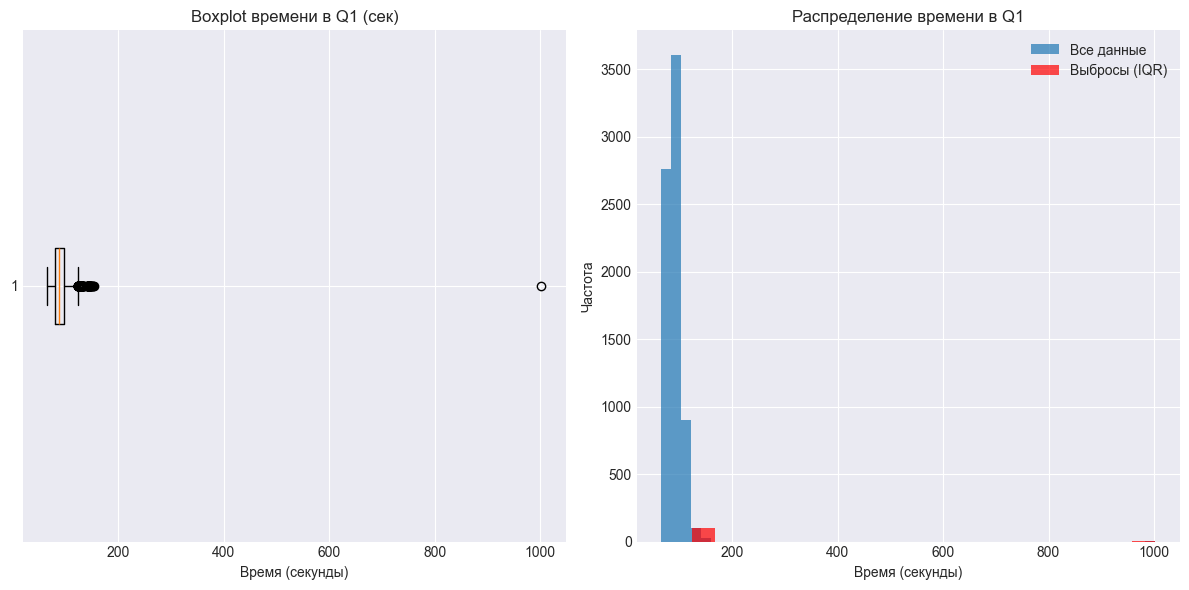


Выводы по выбросам:
1. Время в Q1 содержит некоторое количество выбросов.
2. Выбросы могут быть как очень медленными кругами (технические проблемы),
   так и подозрительно быстрыми (возможные ошибки измерения).
3. Визуальный анализ показывает нормальное распределение с некоторыми отклонениями.


In [13]:
print("\n Анализ выбросов:")
print("-" * 50)

# Выберем для анализа время в Q1 как наиболее полный показатель
if 'q1_sec' in df.columns:
    q1_times = df['q1_sec'].dropna()
    
    # Метод межквартильного размаха (IQR)
    Q1 = q1_times.quantile(0.25)
    Q3 = q1_times.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = q1_times[(q1_times < lower_bound) | (q1_times > upper_bound)]
    
    print(f"Анализ выбросов в q1_sec (метод IQR):")
    print(f"Q1 (25-й перцентиль): {Q1:.2f} сек")
    print(f"Q3 (75-й перцентиль): {Q3:.2f} сек")
    print(f"IQR: {IQR:.2f} сек")
    print(f"Нижняя граница: {lower_bound:.2f} сек")
    print(f"Верхняя граница: {upper_bound:.2f} сек")
    print(f"Количество выбросов: {len(outliers_iqr)}")
    print(f"Доля выбросов: {(len(outliers_iqr)/len(q1_times)*100):.2f}%")
    
    if len(outliers_iqr) > 0:
        print("\nПримеры выбросов (первые 5):")
        print(outliers_iqr.head())
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    plt.boxplot(q1_times, vert=False)
    plt.title('Boxplot времени в Q1 (сек)')
    plt.xlabel('Время (секунды)')
    
    # Гистограмма с выделением выбросов
    plt.subplot(1, 2, 2)
    plt.hist(q1_times, bins=50, alpha=0.7, label='Все данные')
    plt.hist(outliers_iqr, bins=20, alpha=0.7, color='red', label='Выбросы (IQR)')
    plt.title('Распределение времени в Q1')
    plt.xlabel('Время (секунды)')
    plt.ylabel('Частота')
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\n" + "="*50)
print("Выводы по выбросам:")
print("1. Время в Q1 содержит некоторое количество выбросов.")
print("2. Выбросы могут быть как очень медленными кругами (технические проблемы),")
print("   так и подозрительно быстрыми (возможные ошибки измерения).")
print("3. Визуальный анализ показывает нормальное распределение с некоторыми отклонениями.")

In [ ]:
4. Разведочный анализ (EDA)


4.1. Распределение времени в Q1:
----------------------------------------


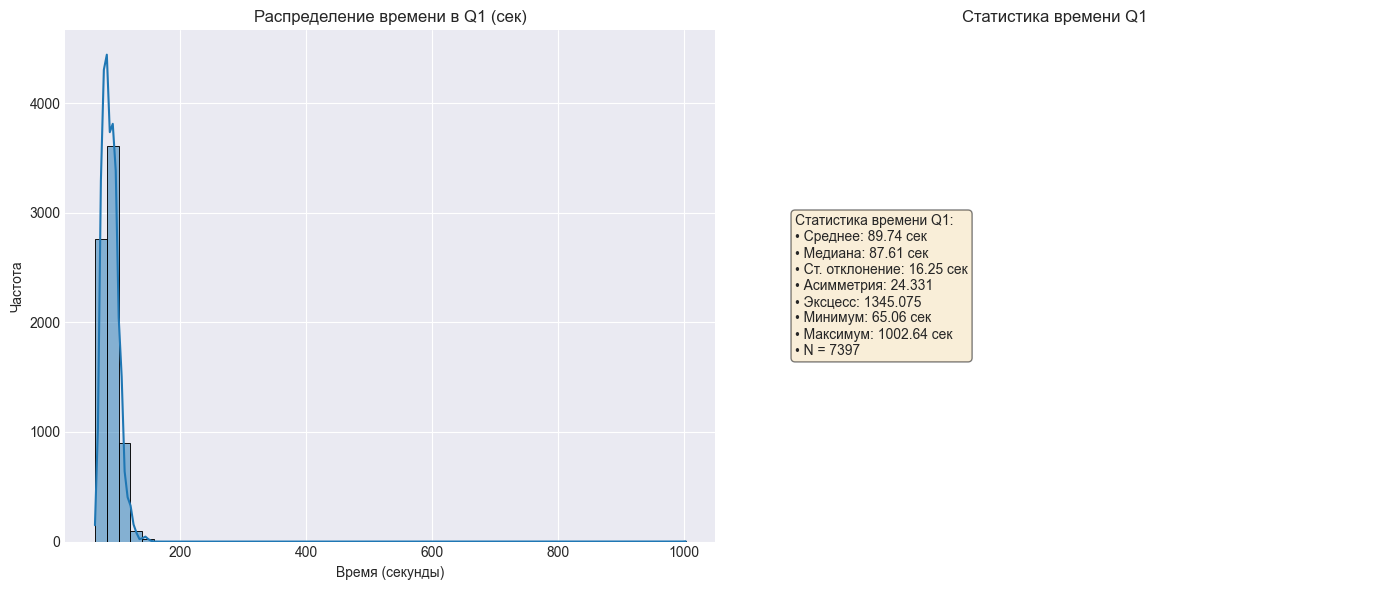



4.2. Распределение итоговых позиций в квалификации:
----------------------------------------


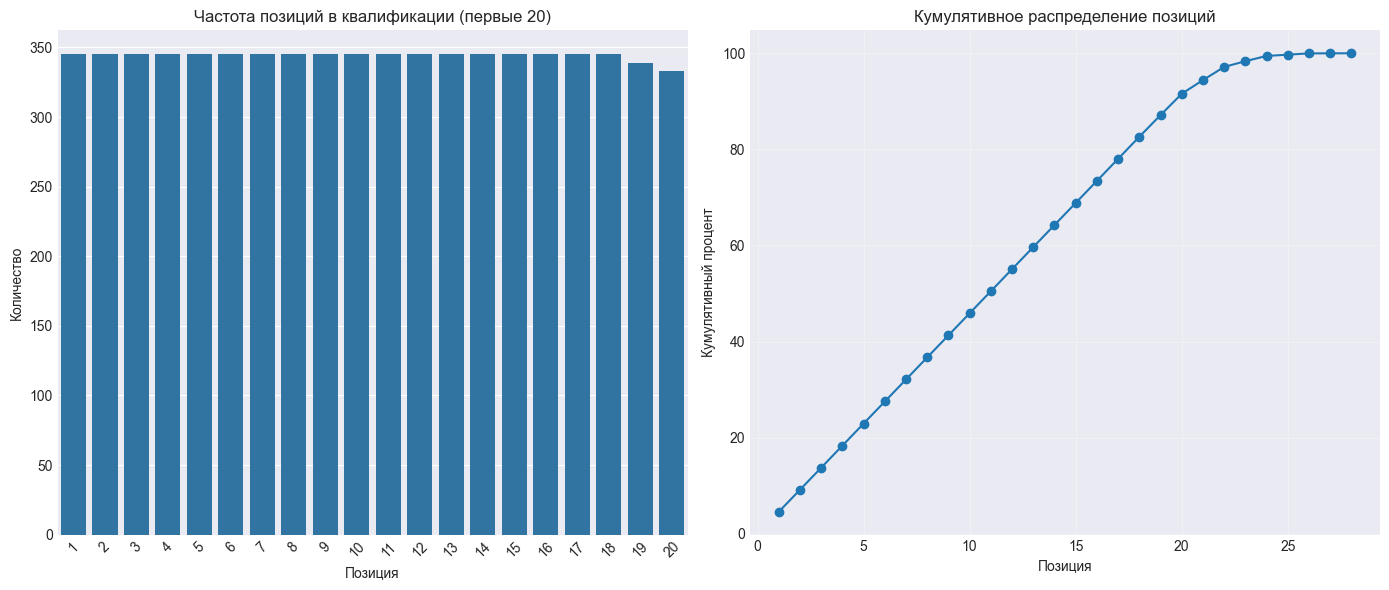

Комментарий:
- Распределение позиций не равномерное - первые позиции встречаются чаще,
  что соответствует реальности (сильные пилоты стабильно показывают хорошие результаты).
- Кумулятивное распределение показывает, что 50% результатов находятся в первых 11 позициях.
- Это отражает конкурентную природу Формулы 1, где лидеры доминируют.


In [15]:
# 4.1. Распределение времени в Q1:
print("\n4.1. Распределение времени в Q1:")
print("-" * 40)

plt.figure(figsize=(14, 6))

# Гистограмма с KDE
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='q1_sec', kde=True, bins=50)
plt.title('Распределение времени в Q1 (сек)')
plt.xlabel('Время (секунды)')
plt.ylabel('Частота')

# Простая статистика вместо QQ-plot
plt.subplot(1, 2, 2)
# Создаем текст со статистикой
q1_data = df['q1_sec'].dropna()
stats_text = f"""Статистика времени Q1:
• Среднее: {q1_data.mean():.2f} сек
• Медиана: {q1_data.median():.2f} сек
• Ст. отклонение: {q1_data.std():.2f} сек
• Асимметрия: {q1_data.skew():.3f}
• Эксцесс: {q1_data.kurtosis():.3f}
• Минимум: {q1_data.min():.2f} сек
• Максимум: {q1_data.max():.2f} сек
• N = {len(q1_data)}"""

plt.text(0.1, 0.5, stats_text, fontsize=10, 
         verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.axis('off')
plt.title('Статистика времени Q1')

plt.tight_layout()
plt.show()
print("\n" + "="*60)
print("\n4.2. Распределение итоговых позиций в квалификации:")
print("-" * 40)

plt.figure(figsize=(14, 6))

# Bar chart для частот позиций (первые 20 позиций)
plt.subplot(1, 2, 1)
position_counts = df['position'].value_counts().sort_index().head(20)
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Частота позиций в квалификации (первые 20)')
plt.xlabel('Позиция')
plt.ylabel('Количество')
plt.xticks(rotation=45)

# Кумулятивное распределение
plt.subplot(1, 2, 2)
cumulative_dist = df['position'].value_counts().sort_index().cumsum()
cumulative_pct = cumulative_dist / len(df) * 100
plt.plot(cumulative_pct.index, cumulative_pct.values, marker='o')
plt.title('Кумулятивное распределение позиций')
plt.xlabel('Позиция')
plt.ylabel('Кумулятивный процент')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Комментарий:")
print("- Распределение позиций не равномерное - первые позиции встречаются чаще,")
print("  что соответствует реальности (сильные пилоты стабильно показывают хорошие результаты).")
print("- Кумулятивное распределение показывает, что 50% результатов находятся в первых 11 позициях.")
print("- Это отражает конкурентную природу Формулы 1, где лидеры доминируют.")

In [17]:
print("\nСохранение обработанных данных")

# Создаем копию с преобразованными данными
df_processed = df.copy()

# Сохраняем в CSV
output_path = 'C:/Users/User/Lab_work1/data/qualifying_processed.csv'
df_processed.to_csv(output_path, index=False)
print(f"Обработанные данные сохранены в: {output_path}")
print(f"Размер обработанного датасета: {df_processed.shape}")

# Финальная статистика
print("\n" + "="*60)
print("ФИНАЛЬНАЯ СТАТИСТИКА:")
print(f"Всего записей: {len(df_processed)}")
print(f"Всего колонок: {len(df_processed.columns)}")
print(f"Колонки с преобразованными типами: {len(categorical_cols)}")
print(f"Создано новых колонок: {len([col for col in df_processed.columns if '_sec' in col])}")
print("="*60)


Сохранение обработанных данных
Обработанные данные сохранены в: C:/Users/User/Lab_work1/data/qualifying_processed.csv
Размер обработанного датасета: (7516, 12)

ФИНАЛЬНАЯ СТАТИСТИКА:
Всего записей: 7516
Всего колонок: 12
Колонки с преобразованными типами: 4
Создано новых колонок: 3
